**Importing dependencies and libraries**

Aim: To predict gold prices using the various features from the given dataset

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**EDA**

Gold Price Dataset: https://www.kaggle.com/altruistdelhite04/gold-price-data

In [71]:
gold_df = pd.read_csv(r'gld_price_data.csv')

In [72]:
gold_df.head() # print first 5 rows in the dataframe

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [73]:
gold_df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [74]:
gold_df.shape # number of rows and columns

(2290, 6)

In [75]:
gold_df.info() # getting some basic informations about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [76]:
gold_df.isnull().sum() # checking the number of missing values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [77]:
gold_df.describe() # getting the statistical measures of the data

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation:**
1. Positive Correlation
2. Negative Correlation

In [78]:
correlation = gold_df.corr()

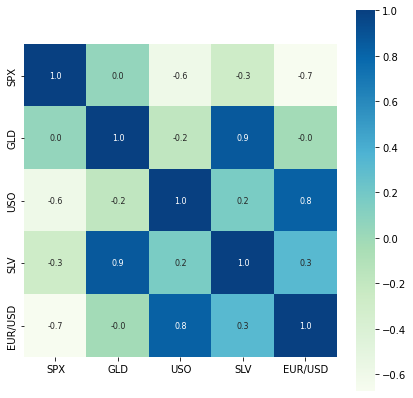

In [79]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='GnBu')

In [80]:
print(correlation['GLD']) # correlation values of GLD

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


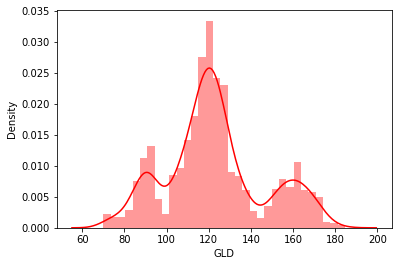

In [81]:
sns.distplot(gold_df['GLD'],color='red') # checking the distribution of the GLD Price

**Splitting Target & Features**

In [82]:
X = gold_df.drop(['Date','GLD'],axis=1)
Y = gold_df['GLD']

In [83]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [84]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Splitting into Training data and Test Data**

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

**Model Training**

Random Forest Regressor

In [86]:
regressor = RandomForestRegressor(n_estimators=100)

In [87]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**Model Evaluation**

In [88]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [89]:

# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(Y_test, test_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  0.9903578918988403
Mean Absolute Error :  1.3229268331149897
Mean squared error :  5.391968224148608
Root Mean squared error :  2.3220612016371596


**Compare the Actual Values and Predicted Values in a Plot**

In [90]:
Y_test = list(Y_test)

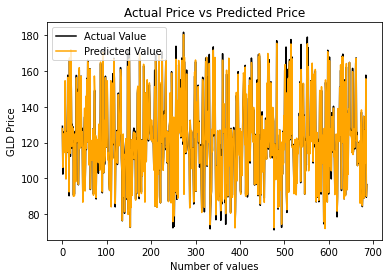

In [91]:
plt.plot(Y_test, color='black', label = 'Actual Value')
plt.plot(test_data_prediction, color='orange', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Code written by Dhrumil Vadodaria!!

Connect with me on LinkedIn for future discussions on ML: https://www.linkedin.com/in/dhrumil-v-814932128/

Please provide citation if you use the code!